In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
import glob
import numpy as np

output_dir = os.path.join(os.path.dirname(os.getcwd()), "result/data")

csv_files = glob.glob(os.path.join(output_dir, "results_*.csv"))

dataframes = []
for file in csv_files:
    basename = os.path.basename(file)
    parts = basename.replace(".csv", "").split("_")
    N = int(parts[1][1:])
    tau = float(parts[2][3:])

    df = pd.read_csv(file)
    df["N"] = N
    df["tau"] = tau
    dataframes.append(df)

full_df = pd.concat(dataframes, ignore_index=True)

plot_dir = os.path.join(os.path.dirname(os.getcwd()), "plots")
os.makedirs(plot_dir, exist_ok=True)

methods = [
    "local_all",
    "goa",
    "edge_all",
    "dmin",
    "ga",
]
method_colors = {
    "local_all": "#1f77b4",  # 파랑 계열
    "goa": "#ff7f0e",  # 주황 계열
    "edge_all": "#2ca02c",  # 초록 계열
    "dmin": "#9467bd",  # 보라 계열
    "ga": "#8c564b",  # 갈색 계열
}

In [4]:
def plot_accuracy_vs_N(df, fixed_tau, save=True, show=True):
    sub = df[df["tau"] == fixed_tau].sort_values(by="N").reset_index(drop=True)

    plt.figure()
    for method in methods:
        plt.plot(sub["N"], sub[f"accuracy_{method}"], marker="o", label=method)

    plt.xlabel("N")
    plt.ylabel("Accuracy")
    plt.title(f"Accuracy vs N (tau={fixed_tau})")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.xticks(range(40, sub["N"].max() + 1, 10))
    plt.tight_layout()

    if save:
        fname = f"accuracy_vs_N_tau{fixed_tau}.png"
        plt.savefig(os.path.join(plot_dir, fname), bbox_inches="tight")

    if show:
        plt.show()
    else:
        plt.close()


def plot_delay_edge_vs_N(df, fixed_tau, save=True, show=True):
    sub = df[df["tau"] == fixed_tau].sort_values(by="N").reset_index(drop=True)

    plt.figure()
    for method in methods:
        plt.plot(sub["N"], sub[f"delay_edge_{method}"], marker="o", label=method)

    plt.xlabel("N")
    plt.ylabel("Delay")
    plt.title(f"Delay_edge vs N (tau={fixed_tau})")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.xticks(range(40, sub["N"].max() + 1, 10))
    plt.tight_layout()

    if save:
        fname = f"delay_edge_vs_N_tau{fixed_tau}.png"
        plt.savefig(os.path.join(plot_dir, fname), bbox_inches="tight")

    if show:
        plt.show()
    else:
        plt.close()


def plot_delay_local_vs_N(df, fixed_tau, save=True, show=True):
    sub = df[df["tau"] == fixed_tau].sort_values(by="N").reset_index(drop=True)

    plt.figure()
    for method in methods:
        plt.plot(sub["N"], sub[f"delay_local_{method}"], marker="o", label=method)

    plt.xlabel("N")
    plt.ylabel("Delay")
    plt.title(f"Delay_local vs N (tau={fixed_tau})")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.xticks(range(40, sub["N"].max() + 1, 10))
    plt.tight_layout()

    if save:
        fname = f"delay_local_vs_N_tau{fixed_tau}.png"
        plt.savefig(os.path.join(plot_dir, fname), bbox_inches="tight")

    if show:
        plt.show()
    else:
        plt.close()


def plot_t_comm_vs_N(df, fixed_tau, save=True, show=True):
    sub = df[df["tau"] == fixed_tau].sort_values(by="N").reset_index(drop=True)

    plt.figure()
    for method in methods:
        plt.plot(sub["N"], sub[f"t_comm_{method}"], marker="o", label=method)

    plt.xlabel("N")
    plt.ylabel("t_comm")
    plt.title(f"t_comm vs N (tau={fixed_tau})")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.xticks(range(40, sub["N"].max() + 1, 10))
    plt.tight_layout()

    if save:
        fname = f"t_comm_vs_N_tau{fixed_tau}.png"
        plt.savefig(os.path.join(plot_dir, fname), bbox_inches="tight")

    if show:
        plt.show()
    else:
        plt.close()


def plot_t_comp_vs_N(df, fixed_tau, save=True, show=True):
    sub = df[df["tau"] == fixed_tau].sort_values(by="N").reset_index(drop=True)

    plt.figure()
    for method in methods:
        plt.plot(sub["N"], sub[f"t_comp_{method}"], marker="o", label=method)

    plt.xlabel("N")
    plt.ylabel("t_comp")
    plt.title(f"t_comp vs N (tau={fixed_tau})")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.xticks(range(40, sub["N"].max() + 1, 10))
    plt.tight_layout()

    if save:
        fname = f"t_comp_vs_N_tau{fixed_tau}.png"
        plt.savefig(os.path.join(plot_dir, fname), bbox_inches="tight")

    if show:
        plt.show()
    else:
        plt.close()

In [5]:
def plot_t_vs_N(df, fixed_tau, save=True, show=True):
    sub = df[df["tau"] == fixed_tau].sort_values(by="N").reset_index(drop=True)
    N_vals = sub["N"].values
    bar_width = 0.12
    x = np.arange(len(N_vals))

    plt.figure(figsize=(14, 6))
    ax = plt.gca()

    for i, method in enumerate(methods):
        offset = (i - (len(methods) - 1) / 2) * bar_width
        x_positions = x + offset

        local_vals = sub[f"delay_local_{method}"].values / sub["N"]
        comm_vals = sub[f"t_comm_{method}"].values / sub["N"]
        comp_vals = sub[f"t_comp_{method}"].values / sub["N"]

        base_colors = method_colors[method]
        c_local = to_rgba(base_colors, 1.0)
        c_comm = to_rgba(base_colors, 0.7)
        c_comp = to_rgba(base_colors, 0.4)

        # 스택형 막대
        ax.bar(
            x_positions,
            local_vals,
            width=bar_width,
            color=c_local,
            label=method,
        )
        ax.bar(
            x_positions,
            comm_vals,
            width=bar_width,
            bottom=local_vals,
            color=c_comm,
        )
        ax.bar(
            x_positions,
            comp_vals,
            width=bar_width,
            bottom=local_vals + comm_vals,
            color=c_comp,
        )

    ax.set_xticks(x)
    ax.set_xticklabels([str(n) for n in N_vals])
    ax.set_xlabel("N")
    ax.set_ylabel("Time (s)")
    ax.set_title(f"Execution Time Breakdown by Method (tau={fixed_tau})")
    ax.legend(title="Method", loc="upper left", bbox_to_anchor=(1, 1))
    ax.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()

    if save:
        fname = f"time_breakdown_vs_N_tau{fixed_tau}.png"
        plt.savefig(os.path.join(plot_dir, fname), bbox_inches="tight")

    if show:
        plt.show()
    else:
        plt.close()

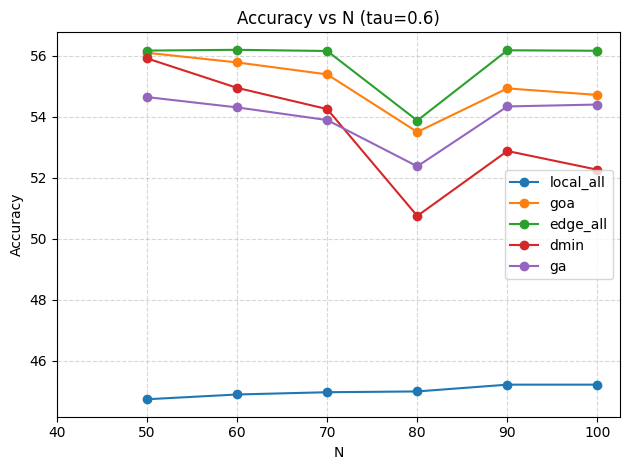

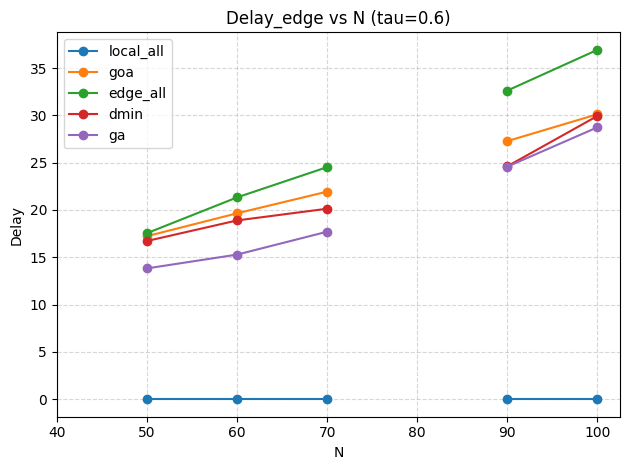

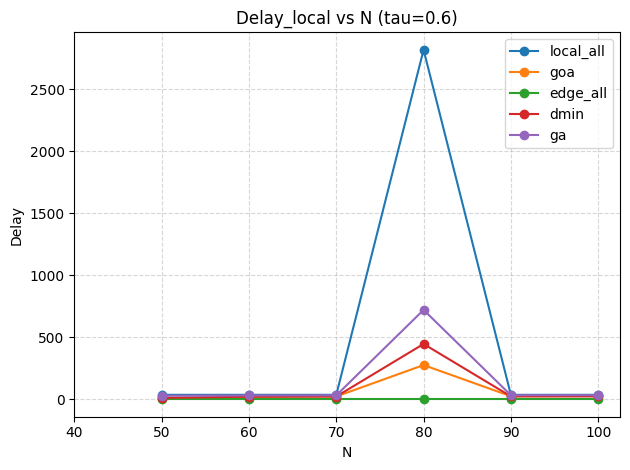

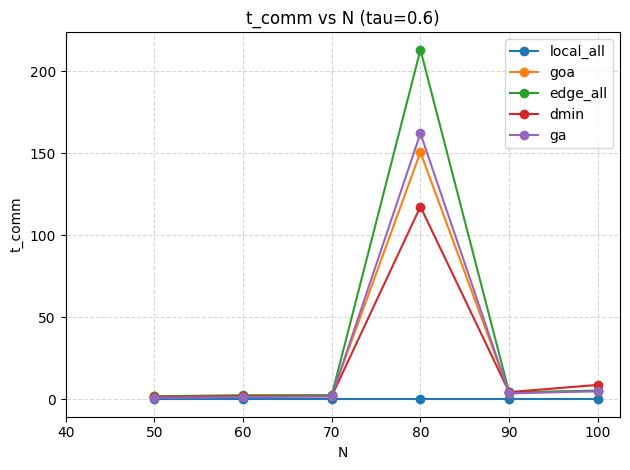

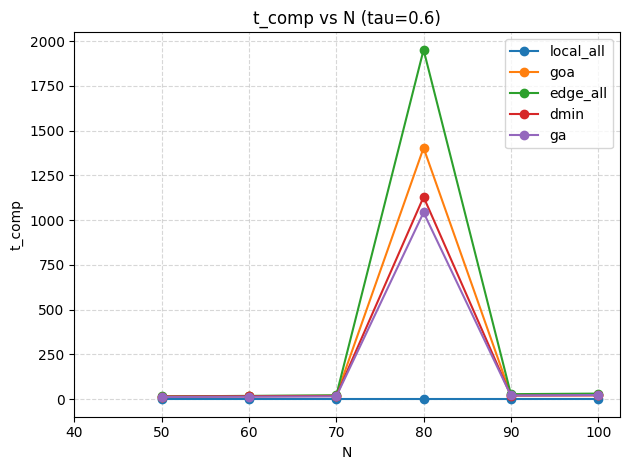

In [53]:
for tau_val in sorted(full_df["tau"].unique()):
    plot_accuracy_vs_N(full_df, fixed_tau=tau_val, save=False)
    plot_delay_edge_vs_N(full_df, fixed_tau=tau_val, save=False)
    plot_delay_local_vs_N(full_df, fixed_tau=tau_val, save=False)
    plot_t_comm_vs_N(full_df, fixed_tau=tau_val, save=False)
    plot_t_comp_vs_N(full_df, fixed_tau=tau_val, save=False)

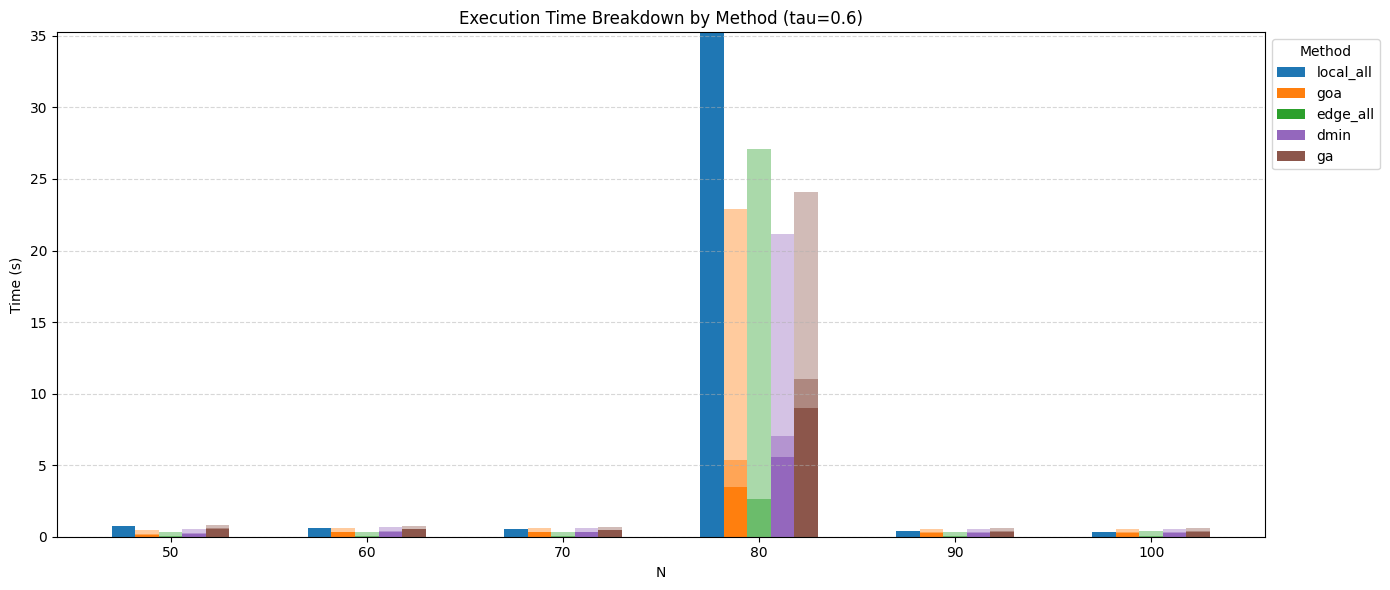

In [6]:
for tau_val in sorted(full_df["tau"].unique()):
    plot_t_vs_N(full_df, fixed_tau=tau_val, save=False)